In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os, zipfile, requests, io
from wordcloud import WordCloud
from pathlib import Path
from transformers import AutoTokenizer
sns.set_theme(style="whitegrid")

/opt/anaconda3/envs/moodgraph/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
DATA_DIR = Path("data")

In [12]:
print("Leyendo TASS train/dev …")
cols = ["tweet", "label "]
tass_train = pd.read_csv(DATA_DIR/"train.tsv", sep="\t", usecols=cols)
tass_dev   = pd.read_csv(DATA_DIR/"dev.tsv",   sep="\t", usecols=cols)


Leyendo TASS train/dev …


In [20]:
tass_train.rename(columns={"tweet": "tweet", "label ": "label"}, inplace=True)
tass_dev.rename(columns={"tweet": "tweet", "label ": "label"}, inplace=True)


In [23]:
tass_train.info()
tass_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886 entries, 0 to 5885
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   5886 non-null   object
 1   label   5886 non-null   object
dtypes: object(2)
memory usage: 92.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   857 non-null    object
 1   label   857 non-null    object
dtypes: object(2)
memory usage: 13.5+ KB


In [21]:
tass_train.label.value_counts()

label
others       2889
joy          1270
sadness       706
anger         600
surprise      241
disgust       113
fear           67
Name: count, dtype: int64

In [18]:
print("Leyendo EmoEvent …")
# EmoEvent tiene columna 'emotion', no 'label'
emo_df = pd.read_csv(DATA_DIR/"emoevent_es.csv", usecols=["tweet","emotion"], sep="\t")\
            .rename(columns={"emotion":"label"})

Leyendo EmoEvent …


In [24]:
emo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8409 entries, 0 to 8408
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   8409 non-null   object
 1   label   8409 non-null   object
dtypes: object(2)
memory usage: 131.5+ KB


In [22]:
emo_df.label.value_counts()

label
others      4127
joy         1815
sadness     1009
anger        857
surprise     344
disgust      161
fear          96
Name: count, dtype: int64

In [29]:

combined = pd.concat([tass_train, tass_dev, emo_df])
combined["label"] = combined.label.str.strip()
print("Dataset final:", combined.shape)
combined.to_csv(DATA_DIR/"dataset.csv", index=False)

Dataset final: (15152, 2)


In [30]:
combined.label.unique()

array(['sadness', 'joy', 'others', 'surprise', 'disgust', 'anger', 'fear'],
      dtype=object)

# EDA

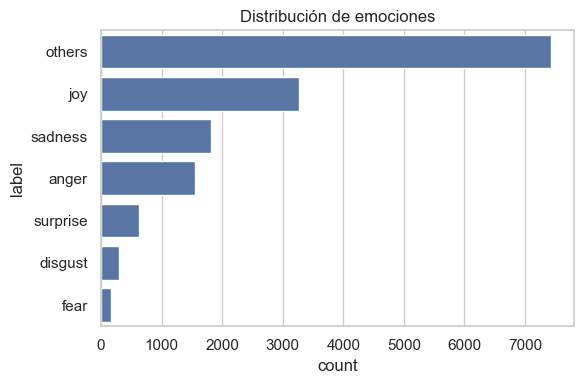

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data=combined, y="label", order=combined.label.value_counts().index)
plt.title("Distribución de emociones"); plt.tight_layout(); plt.show()

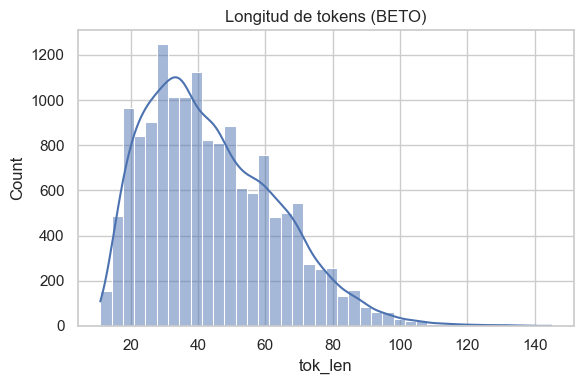

In [32]:
Tok = AutoTokenizer.from_pretrained("finiteautomata/beto-emotion-analysis")
combined["tok_len"] = combined.tweet.apply(lambda t: len(Tok(t)["input_ids"]))
plt.figure(figsize=(6,4))
sns.histplot(combined.tok_len, bins=40, kde=True)
plt.title("Longitud de tokens (BETO)"); plt.tight_layout(); plt.show()

In [33]:
print("Generando word‑clouds …")
wc_dir = DATA_DIR/"wordclouds"; wc_dir.mkdir(exist_ok=True)
for lbl in combined.label.unique():
    WordCloud(width=400,height=200,background_color="white")\
        .generate(" ".join(combined[combined.label==lbl].tweet))\
        .to_file(wc_dir/f"wc_{lbl}.png")
print("Word‑clouds guardados en", wc_dir)

Generando word‑clouds …
Word‑clouds guardados en data/wordclouds
